# **CDN-UFPB**
## Tópico: Datetime
---
- **Professor: Aléssio Almeida**
- **Disciplina: Técnicas de Pesquisa e Análise de Dados II**

### Referências
- Chen, D. (2018). Análise de Dados com Python e Pandas. 8 ed. São Paulo: Novatec. *Cap. 11*


Um dos diferenciais do Pandas?

- Capacidade de trabalhar com séries temporais


1. biblioteca `datetime` embutida no Pandas
2. Strings em datetime
3. Formatação de datas
4. Extração de componentes de datas
5. Cálculos com datas
6. Datetime em DF (Ações)

## Objeto datetime

In [26]:
from datetime import datetime, timedelta

now = datetime.now()
print(now)

2022-11-07 14:50:18.859773


In [7]:
now.date().isoformat()

'2022-11-07'

In [2]:
type(now)

datetime.datetime

In [19]:
dtnasc = datetime(2000,1,1)

In [23]:
# Qual é a idade desse indivíduo agora?
idade = (now - dtnasc)

idade

datetime.timedelta(days=8346, seconds=52688, microseconds=739487)

In [24]:
idade.total_seconds()/(3600*24*365)

22.867424173626556

In [21]:
# Qual é a idade desse indivíduo agora?
(now - dtnasc).days/365

22.865753424657534

In [25]:
type(idade)

datetime.timedelta

In [32]:
dtnasc + timedelta(days=24)

datetime.datetime(2000, 1, 25, 0, 0)

# Conversão para datetime em DF

In [50]:
import pandas as pd

d = pd.DataFrame(
    dict(
        # data=['24/11/2022', '18/12/2022'], #"%d/%m/%Y"
        #  data=['24/11/22', '18/12/22'],#"%d/%m/%y"
        data=['11/24/22 16:00:00', '12/18/22 12:00:00'],#"%m/%d/%y"
        evento=['Estreia', 'Final']))

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2 non-null      object
 1   evento  2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes


0    24/11/22
1    18/12/22
Name: data_dt, dtype: object

In [64]:
d['data_dt'] = pd.to_datetime(d.data, format="%m/%d/%y %H:%M:%S")
d['data_ft'] = d['data_dt'].dt.strftime("%d de %B de %Y")
d

data   evento             data_dt                contagem  \
0  11/24/22 16:00:00  Estreia 2022-11-24 16:00:00 17 days 00:50:03.930874   
1  12/18/22 12:00:00    Final 2022-12-18 12:00:00 40 days 20:50:03.930874   

                  data_ft  
0  24 de November de 2022  
1  18 de December de 2022

In [54]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     2 non-null      object        
 1   evento   2 non-null      object        
 2   data_dt  2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 176.0+ bytes


In [55]:
d['contagem'] = d.data_dt - datetime.now()

d

data   evento             data_dt                contagem
0  11/24/22 16:00:00  Estreia 2022-11-24 16:00:00 17 days 00:50:03.930874
1  12/18/22 12:00:00    Final 2022-12-18 12:00:00 40 days 20:50:03.930874

In [49]:
d

data   evento    data_dt                contagem
0  11/24/22  Estreia 2022-11-24 16 days 09:09:41.140227
1  12/18/22    Final 2022-12-18 40 days 09:09:41.140227

In [65]:
import os
os.getcwd()

'/Users/alessiotony/repositorios/public/dspy/notebooks/tpadii'

In [68]:
import pandas as pd

# dados de Ebola
d = pd.read_csv("../../data/country_timeseries.csv")

d.head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN              2977.0             NaN   
1         1781.0             NaN              2943.0             NaN   
2         1767.0          3496.0              2915.0             NaN   
3            NaN          3496.0                 NaN             NaN   
4         1739.0          3471.0              2827.0             NaN   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             NaN                  NaN           NaN          NaN  
1             NaN                  NaN           NaN          NaN  
2             NaN                  NaN           NaN          NaN  
3             NaN                  NaN           NaN          NaN  
4             NaN                  NaN           NaN          NaN

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [69]:
d['date_dt'] = pd.to_datetime(d.Date, format='%m/%d/%Y')

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [9]:
d[['Date', 'date_dt']]

Date    date_dt
0      1/5/2015 2015-01-05
1      1/4/2015 2015-01-04
2      1/3/2015 2015-01-03
3      1/2/2015 2015-01-02
4    12/31/2014 2014-12-31
..          ...        ...
117   3/27/2014 2014-03-27
118   3/26/2014 2014-03-26
119   3/25/2014 2014-03-25
120   3/24/2014 2014-03-24
121   3/22/2014 2014-03-22

[122 rows x 2 columns]

# Carregando dados que incluam datas

In [72]:
# dados de Ebola
d = pd.read_csv("../../data/country_timeseries.csv", parse_dates=[0])

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [11]:
d.head(5)

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0 2015-01-05  289        2776.0            NaN            10030.0   
1 2015-01-04  288        2775.0            NaN             9780.0   
2 2015-01-03  287        2769.0         8166.0             9722.0   
3 2015-01-02  286           NaN         8157.0                NaN   
4 2014-12-31  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN              2977.0             NaN   
1         1781.0             NaN              2943.0             NaN   
2         1767.0          3496.0              2915.0             NaN   
3            NaN          3496.0                 NaN             NaN   
4         1739.0          3471.0              2827.0             NaN   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             NaN                  NaN           NaN          NaN  
1             NaN                  NaN           NaN          NaN  
2             NaN                  NaN           NaN          NaN  
3             NaN                  NaN           NaN          NaN  
4             NaN                  NaN           NaN          NaN

# Extraindo componentes

In [12]:
d.Date.dt.dayofweek

0      0
1      6
2      5
3      4
4      2
      ..
117    3
118    2
119    1
120    0
121    5
Name: Date, Length: 122, dtype: int64

In [73]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html

d = d.assign(
    year = lambda x: x.Date.dt.year,
    month = lambda x: x.Date.dt.month,
    day = lambda x: x.Date.dt.day,
    week = lambda x: x.Date.dt.isocalendar().week,
    quarter = lambda x: x.Date.dt.quarter,
    dayofweek = lambda x: x.Date.dt.dayofweek.map({0:'SEG', 1:'TER', 2:'QUA', 3:'QUI', 4:'SEX', 5:'SAB', 6:'DOM'}),
)

d[['Date', 'year', 'month', 'day', 'dayofweek', 'week', 'quarter']]

Date  year  month  day dayofweek  week  quarter
0   2015-01-05  2015      1    5       SEG     2        1
1   2015-01-04  2015      1    4       DOM     1        1
2   2015-01-03  2015      1    3       SAB     1        1
3   2015-01-02  2015      1    2       SEX     1        1
4   2014-12-31  2014     12   31       QUA     1        4
..         ...   ...    ...  ...       ...   ...      ...
117 2014-03-27  2014      3   27       QUI    13        1
118 2014-03-26  2014      3   26       QUA    13        1
119 2014-03-25  2014      3   25       TER    13        1
120 2014-03-24  2014      3   24       SEG    13        1
121 2014-03-22  2014      3   22       SAB    12        1

[122 rows x 7 columns]

# Cálculos com datas

Nos dados temos uma coluna `Day` que refere-se ao número de dias que ocorre um surto de Ebola em um país

- Vamos recriar essa coluna a partir da aritmética com datas

In [14]:
# Qual o primeiro dia do surto nos dados?
d.Date.min()

Timestamp('2014-03-22 00:00:00')

In [15]:
# Dias de surto
d['surto'] = (d.Date - d.Date.min())
d['surto_int'] = d.surto.dt.days

# Objeto timedelta
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

In [16]:
d[['Date', 'surto', 'surto_int']]

Date    surto  surto_int
0   2015-01-05 289 days        289
1   2015-01-04 288 days        288
2   2015-01-03 287 days        287
3   2015-01-02 286 days        286
4   2014-12-31 284 days        284
..         ...      ...        ...
117 2014-03-27   5 days          5
118 2014-03-26   4 days          4
119 2014-03-25   3 days          3
120 2014-03-24   2 days          2
121 2014-03-22   0 days          0

[122 rows x 3 columns]

In [25]:
help(d.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

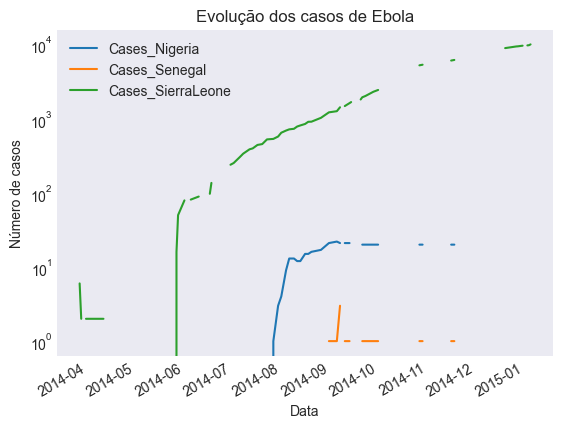

In [32]:
import matplotlib.pyplot as plt

# plt.style.available
plt.style.use('seaborn-dark')

d.plot(x='Date', y=['Cases_Nigeria', 'Cases_Senegal', 'Cases_SierraLeone'], 
       title='Evolução dos casos de Ebola', xlabel='Data', ylabel='Número de casos', logy=True)

# plt.savefig('teste.pdf')

# Dados de ações

In [74]:
import yfinance as yf

# Apple
apple = yf.download('AAPL')
tesla = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [76]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10565 entries, 1980-12-12 to 2022-11-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10565 non-null  float64
 1   High       10565 non-null  float64
 2   Low        10565 non-null  float64
 3   Close      10565 non-null  float64
 4   Adj Close  10565 non-null  float64
 5   Volume     10565 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 577.8 KB


## Selecionado elementos de uma `string` por um índice de posição

- De modo similar às listas, cada caractere de uma `string` ocupa uma posição
  com indexação positiva ou negativa.

In [77]:
apple[apple.index>'2020-01-01']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.561539   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.846375   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.426834   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.081490   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.257103   
...                ...         ...         ...         ...         ...   
2022-10-31  153.160004  154.240005  151.919998  153.339996  153.086044   
2022-11-01  155.080002  155.449997  149.130005  150.649994  150.400497   
2022-11-02  148.949997  152.169998  145.000000  145.029999  144.789810   
2022-11-03  142.059998  142.800003  138.750000  138.880005  138.650009   
2022-11-04  142.089996  142.669998  134.380005  138.380005  138.380005   

               Volume  
Date                   
2020-01-02  135480400  
2020-01-03  146322800  
2020-01-06  118387200  
2020-01-07  108872000  
2020-01-08  132079200  
...               ...  
2022-10-31   97943200  
2022-11-01   80379300  
2022-11-02   93604600  
2022-11-03   97918500  
2022-11-04  140716700  

[718 rows x 6 columns]

In [80]:
tesla.query('index.dt.year==2010 & index.dt.month>=10')

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-10-01  1.379333  1.383333  1.354000  1.373333   1.373333    8965500
2010-10-04  1.362000  1.411333  1.353333  1.399333   1.399333    9654000
2010-10-05  1.410000  1.418667  1.400667  1.408000   1.408000    4980000
2010-10-06  1.404000  1.417333  1.354667  1.364000   1.364000    4701000
2010-10-07  1.371333  1.376000  1.356000  1.362000   1.362000    2115000
...              ...       ...       ...       ...        ...        ...
2010-12-27  1.868000  1.905333  1.670667  1.703333   1.703333  139528500
2010-12-28  1.723333  1.783333  1.666667  1.760667   1.760667   60844500
2010-12-29  1.802000  1.867333  1.766667  1.848667   1.848667   49788000
2010-12-30  1.846667  1.860000  1.758667  1.766667   1.766667   30616500
2010-12-31  1.771333  1.816667  1.766667  1.775333   1.775333   21268500

[64 rows x 6 columns]

In [38]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10565 entries, 1980-12-12 to 2022-11-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10565 non-null  float64
 1   High       10565 non-null  float64
 2   Low        10565 non-null  float64
 3   Close      10565 non-null  float64
 4   Adj Close  10565 non-null  float64
 5   Volume     10565 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 577.8 KB


<AxesSubplot: xlabel='Date'>

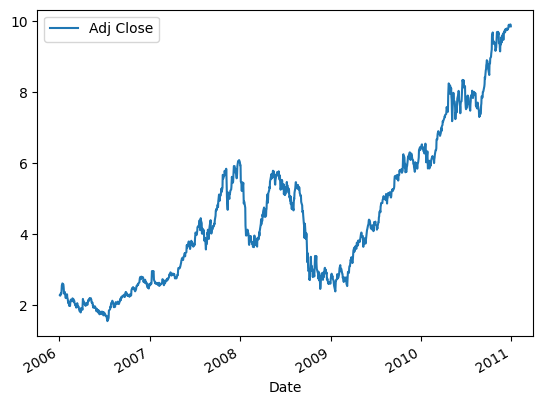

In [83]:
apple.query('index>"2006-01-01" & index<"2010-12-31"').plot(y='Adj Close')

<AxesSubplot:xlabel='Date'>

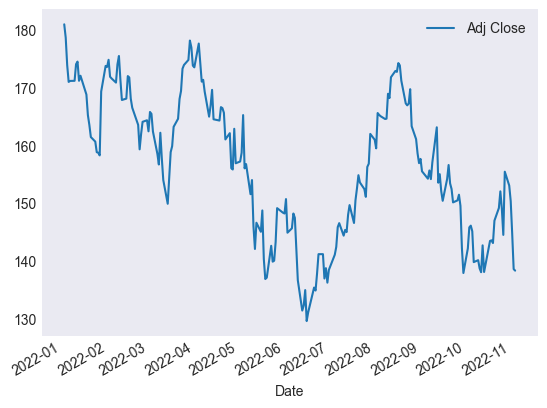

In [46]:
apple.query('index.dt.year==2022').plot(y='Adj Close')

<AxesSubplot:xlabel='Date'>

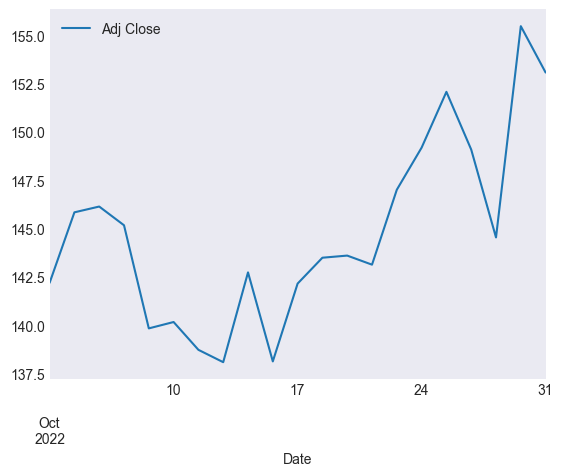

In [47]:
apple.query('index.dt.year==2022 & index.dt.month==10').plot(y='Adj Close')

<AxesSubplot:xlabel='Date'>

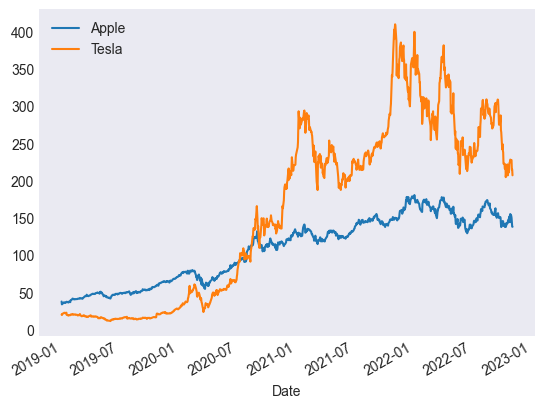

In [59]:
apple['Apple'] = apple['Adj Close']
tesla['Tesla'] = tesla['Adj Close']
df = pd.concat([apple['Apple'],tesla['Tesla']], axis=1)
df.query('index.dt.year>2018').plot()

<AxesSubplot:xlabel='Date'>

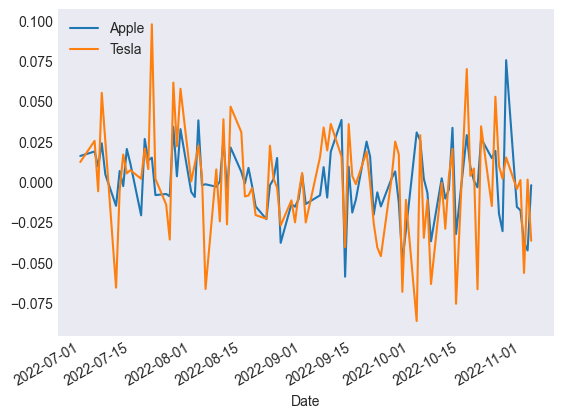

In [67]:
# taxa de retorno
df.assign(
    Apple = lambda x: x.Apple.pct_change(),
    Tesla = lambda x: x.Tesla.pct_change()
).query('index.dt.year==2022 & index.dt.month>6').plot()



## Referências

- Chen (2018). *Pandas for everyone: python data analysis* Addison-Wesley Professional.
- Marcondes (2018). *Matemática com Python*. São Paulo: Novatec.
- Menezes (2019). *Introdução à programação com Python*. 3 ed. São Paulo: Novatec.

